In [1]:
import numpy as np
import matplotlib.pyplot as plt

Stałe

In [2]:
NN = 50
hbar = 1.054*10**(-34)
melec = 9.1*10**(-31)
eV2J = 1.6*10**(-19)
J2eV = 1/eV2J

In [3]:
del_x = 0.2*10**(-9)
dt = 10**(-16)
ra = (0.5*hbar/melec)*(dt/del_x**2)
DX = del_x*10**9
XX = np.arange(0, DX*NN, DX)

In [4]:
Ntime = 2**(16)
Ptime = np.zeros(Ntime, dtype = 'complex_')
Pwin = np.zeros(Ntime, dtype = 'complex_')
PF = np.zeros(Ntime)
FF = np.zeros(Ntime)

In [5]:
delta_f = 1/(Ntime*dt)
delta_E = J2eV*2*np.pi*hbar*delta_f

In [6]:
FF = np.arange(0, delta_E*(Ntime), delta_E)

In [7]:
delta_T = 10**(12)*dt
PS = np.zeros(Ntime)
PS = np.arange(0, delta_T*Ntime, delta_T)

Określenie potencjału

In [8]:
V = np.zeros(NN)

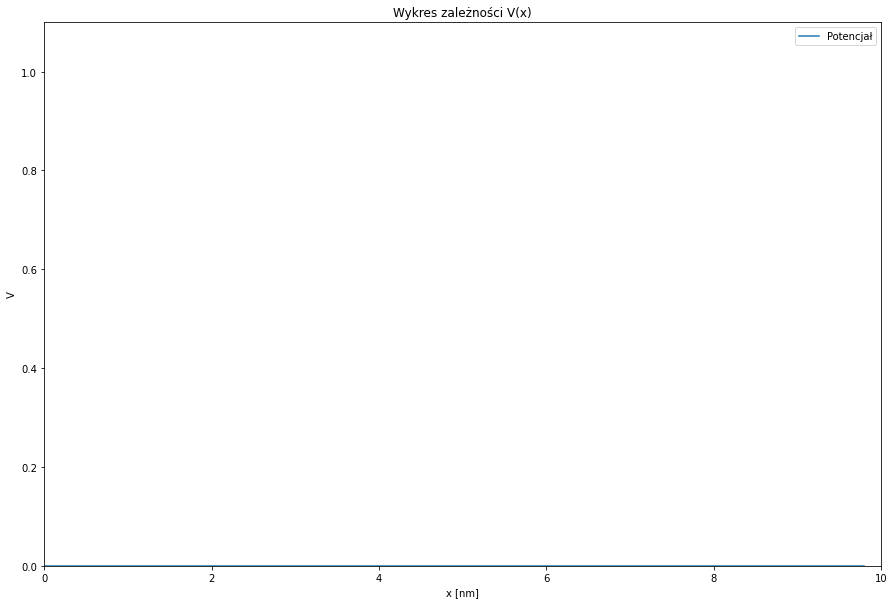

In [9]:
Umax =1

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(0,1.1*Umax)
plt.xlabel('x [nm]')
plt.ylabel('V')
ax.plot(XX, J2eV*V, label = "Potencjał")

plt.legend()
plt.title("Wykres zależności V(x)")
plt.show()


Inicjalizacjcja testowej funkcji (pierwszy przypadek)

In [10]:
sigma = 3
nc = 25
prl = np.zeros(NN)
pim = np.zeros(NN)
ptot = 0
for n in range(1, NN-1):
    prl[n] = np.exp(-1*((25-n)/sigma)**2)
    ptot = ptot + prl[n]**2+pim[n]**2
    
pnorm = np.sqrt(ptot)
ptot = 0
for n in range(NN):
    prl[n] = prl[n]/pnorm
    pim[n] = pim[n]/pnorm
    ptot = ptot +prl[n]**2+pim[n]**2
ptot

1.0

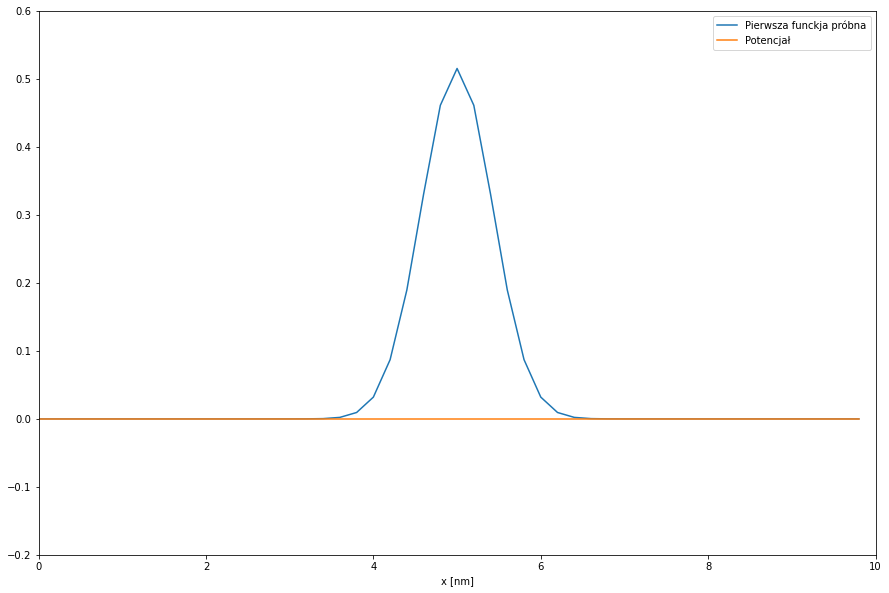

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.2, 0.6)
plt.xlabel('x [nm]')
ax.plot(XX, prl, label = "Pierwsza funckja próbna")
ax.plot(XX, J2eV*V, label="Potencjał")

plt.legend()
plt.show()

Główna pętla FDTD

In [12]:
T = 0
n_step = 10000
for m in range(n_step):
    T = T + 1
    for n in range(1, NN-1):
        prl[n] = prl[n]-ra*(pim[n-1]-2*pim[n]+pim[n+1])+(dt/hbar)*V[n]*pim[n]
    for n in range(1, NN-1):
        pim[n] = pim[n]+ra*(prl[n-1]-2*prl[n]+prl[n+1])-(dt/hbar)*V[n]*prl[n]
    Ptime[T] = prl[nc]-1j*pim[nc]

In [13]:
ptot1 = 0
for n in range(NN):
    ptot1 = ptot1 + prl[n]**2+pim[n]**2
ptot1

1.0026410914721835

Część rzeczywista i urojona funkcji falowej

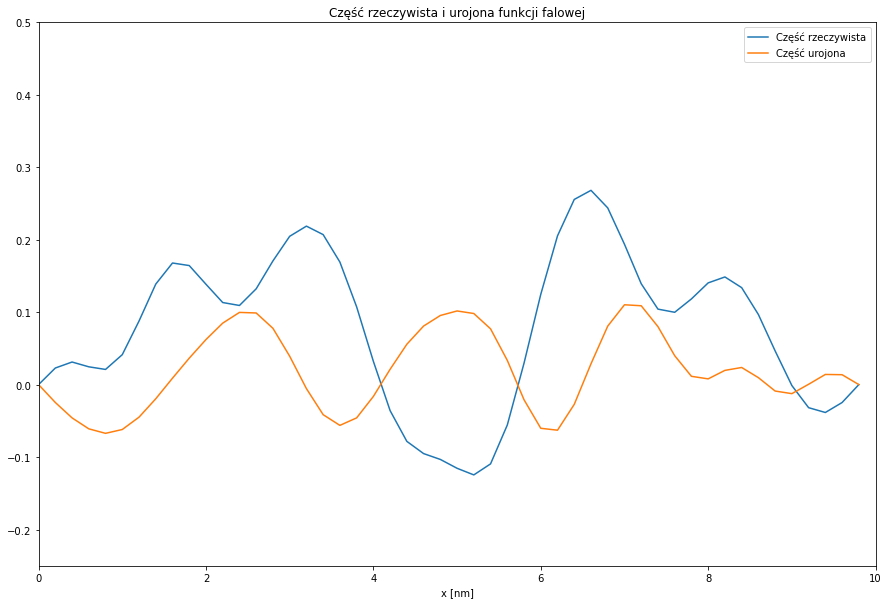

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.25, 0.5)
plt.xlabel('x [nm]')
ax.plot(XX,prl, label="Część rzeczywista")
ax.plot(XX, pim, label="Część urojona")

plt.legend()
plt.title("Część rzeczywista i urojona funkcji falowej")
plt.show()
#ax.plot(XX, J2eV*V)

In [15]:
win = np.zeros(T)
for n in range(T):
    win[n] =1

In [16]:
for m in range(T):
    Pwin[m] = win[m]*Ptime[m]
Pwin

array([0.        +0.j        , 0.51571457+0.0157037j ,
       0.51437795+0.03123019j, ..., 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ])

Symulacja w punkcie 5nm

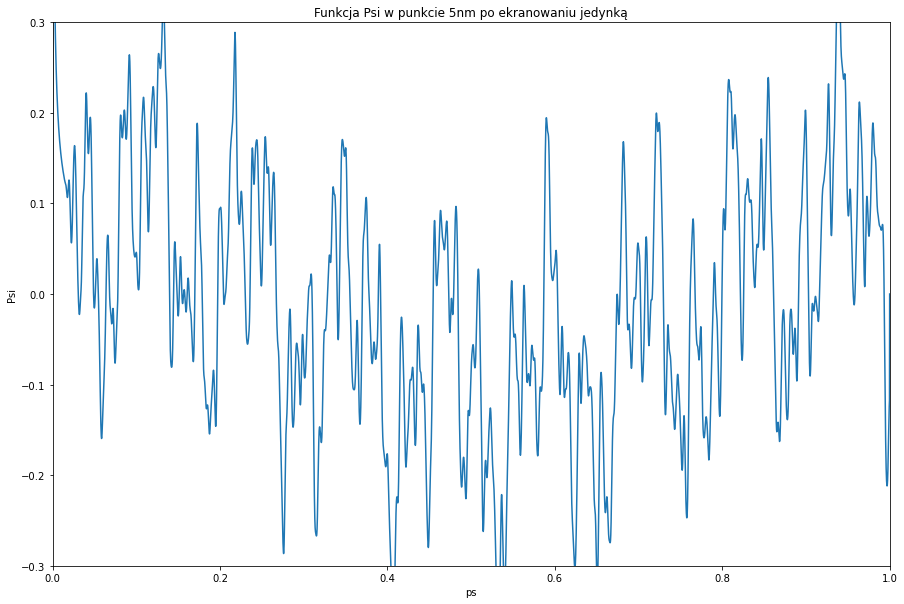

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 10**(12)*dt*T)
ax.set_ylim(-0.3, 0.3)
plt.xlabel('ps')
plt.ylabel('Psi')
ax.plot(PS, np.real(Pwin))

plt.title("Funkcja Psi w punkcie 5nm po ekranowaniu jedynką")
plt.show()

In [18]:
PF = (1/np.sqrt(Ntime))*np.abs(np.fft.fft(Pwin))
Pmax = np.max(PF)

Transformata Fouriera

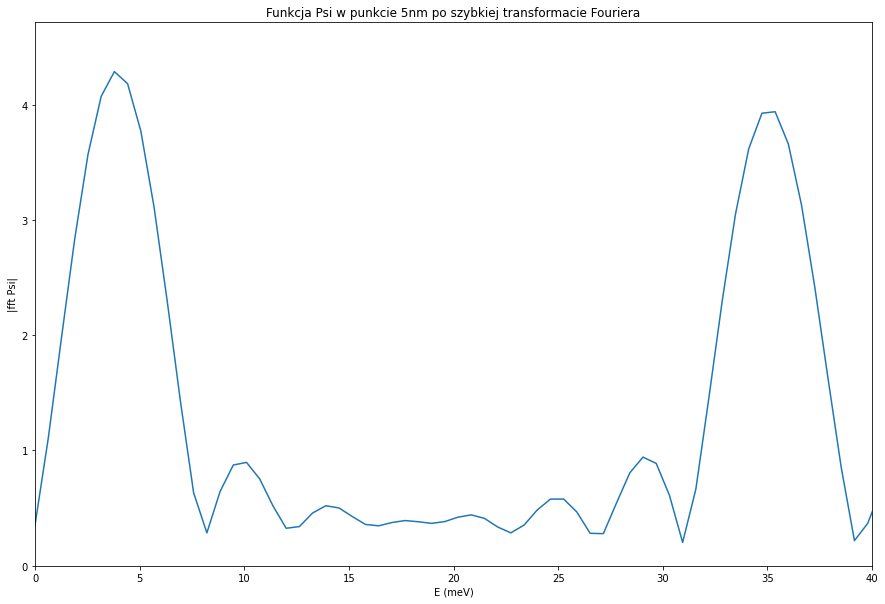

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 40)
ax.set_ylim(0, 1.1*Pmax)
plt.xlabel('E (meV)')
plt.ylabel('|fft Psi|')
ax.plot(10**3*FF, PF)

plt.title("Funkcja Psi w punkcie 5nm po szybkiej transformacie Fouriera")
plt.show()

In [20]:
win = np.zeros(T)
for n in range(T):
    win[n] =0.5*(1-np.cos(2*np.pi*n/T))

In [21]:
for m in range(T):
    Pwin[m] = win[m]*Ptime[m]
Pwin

array([0.00000000e+00+0.00000000e+00j, 5.08989865e-08+1.54989316e-09j,
       2.03068248e-07+1.23291850e-08j, ...,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j])

Ekranowanie nałożone na symulację

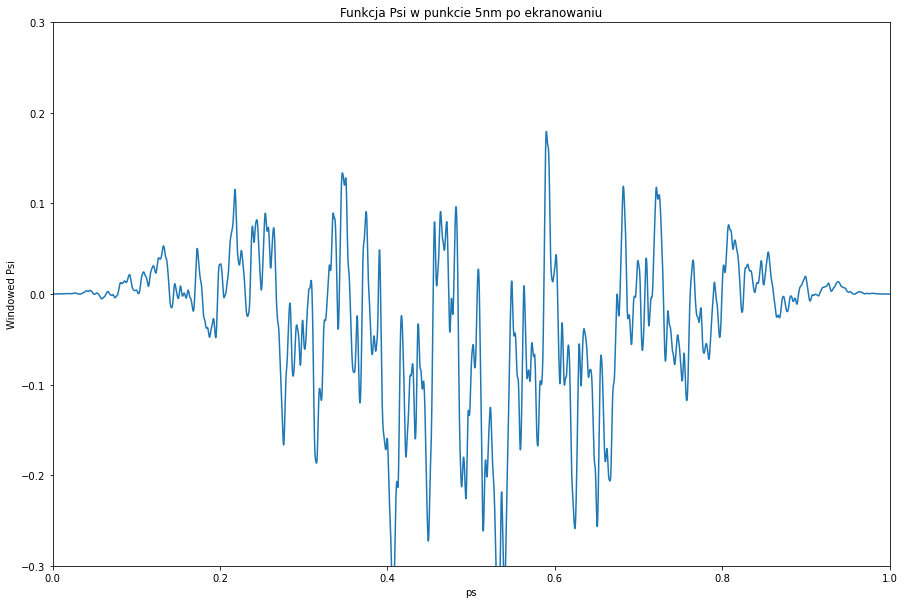

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 10**(12)*dt*T)
ax.set_ylim(-0.3, 0.3)
plt.xlabel('ps')
plt.ylabel('Windowed Psi')
ax.plot(PS, np.real(Pwin))

plt.title("Funkcja Psi w punkcie 5nm po ekranowaniu")
plt.show()

Transformata Fouriera po ekranowaniu

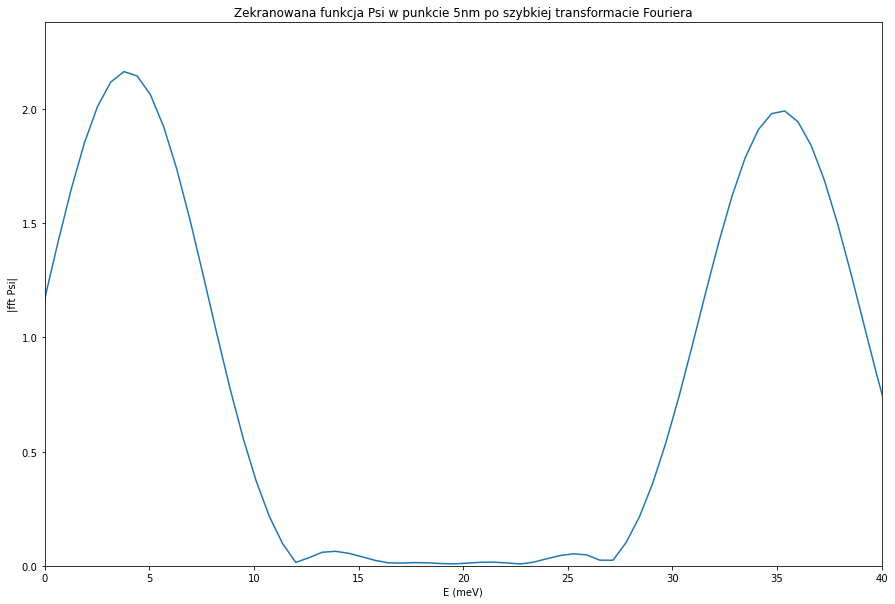

In [23]:
PF = (1/np.sqrt(Ntime))*np.abs(np.fft.fft(Pwin))
Pmax = np.max(PF)
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 40)
ax.set_ylim(0, 1.1*Pmax)
plt.xlabel('E (meV)')
plt.ylabel('|fft Psi|')
ax.plot(10**3*FF, PF)

plt.title("Zekranowana funkcja Psi w punkcie 5nm po szybkiej transformacie Fouriera")
plt.show()

Inicjalizacja testowej funckji (drugi przypadek)

Ortogonalna do pierwszej rozważanej


In [24]:
sigma = 3
nc = 12
prl = np.zeros(NN)
pim = np.zeros(NN)
ptot = 0
for n in range(1, NN-1):
    prl[n] = np.exp(-1*((12.5-n)/sigma)**2)-np.exp(-1*((37.5-n)/sigma)**2)
    ptot = ptot + prl[n]**2+pim[n]**2

In [25]:
pnorm = np.sqrt(ptot)

Normalizacja i sprawdzenie


In [26]:
ptot = 0
for n in range(NN):
    prl[n] = prl[n]/pnorm
    pim[n] = pim[n]/pnorm
    ptot = ptot +prl[n]**2+pim[n]**2
ptot

1.0000000000000007

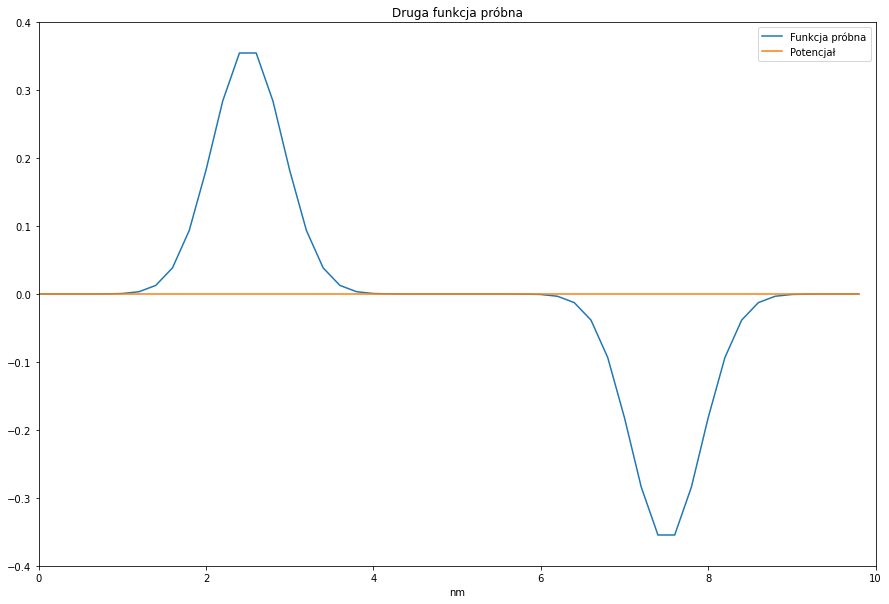

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.4, 0.4)
plt.xlabel('nm')
ax.plot(XX, prl, label="Funkcja próbna")
ax.plot(XX, J2eV*V, label="Potencjał")

plt.title("Druga funkcja próbna")
plt.legend()
plt.show()

Główna pętla FDTD

In [28]:
T = 0
n_step = 10000
for m in range(n_step):
    T = T + 1
    for n in range(1, NN-1):
        prl[n] = prl[n]-ra*(pim[n-1]-2*pim[n]+pim[n+1])+(dt/hbar)*V[n]*pim[n]
    for n in range(1, NN-1):
        pim[n] = pim[n]+ra*(prl[n-1]-2*prl[n]+prl[n+1])-(dt/hbar)*V[n]*prl[n]
    Ptime[T] = prl[nc]-1j*pim[nc]

In [29]:
ptot1 = 0
for n in range(NN):
    ptot1 = ptot1 + prl[n]**2+pim[n]**2
ptot1

1.0041326803978095

Część rzeczywista i urojona funkcji

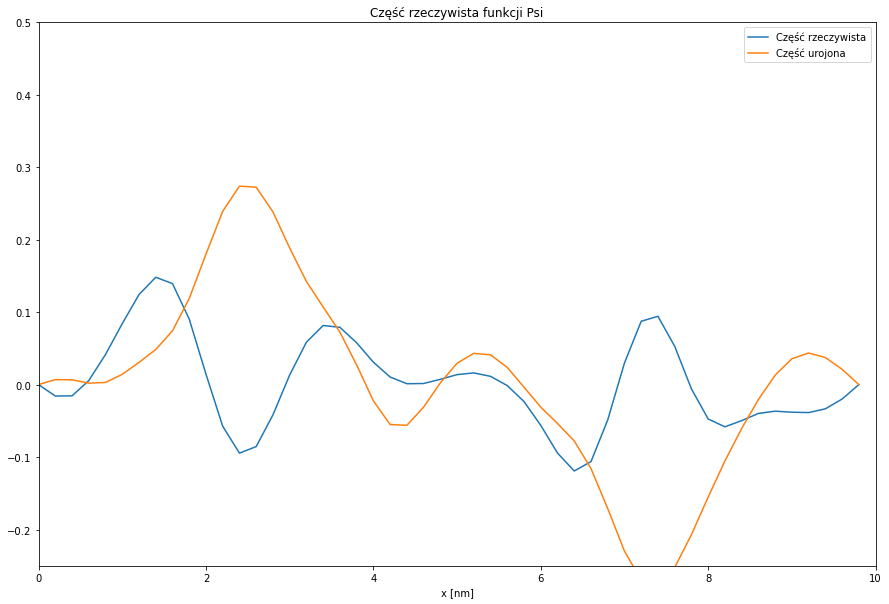

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.25, 0.5)
plt.xlabel('x [nm]')
ax.plot(XX,prl, label="Część rzeczywista")
ax.plot(XX, pim, label="Część urojona")
#ax.plot(XX, J2eV*V)

plt.title("Część rzeczywista funkcji Psi")
plt.legend()
plt.show()

In [31]:
win = np.zeros(T)
for n in range(T):
    win[n] =0.5*(1-np.cos(2*np.pi*n/T))

In [32]:
for m in range(T):
    Pwin[m] = win[m]*Ptime[m]
Pwin

array([0.00000000e+00+0.00000000e+00j, 3.50050257e-08+1.00986988e-09j,
       1.39693702e-07+8.03780293e-09j, ...,
       0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j])

Symulacja z ekranowaniem w punkcie 2.5nm

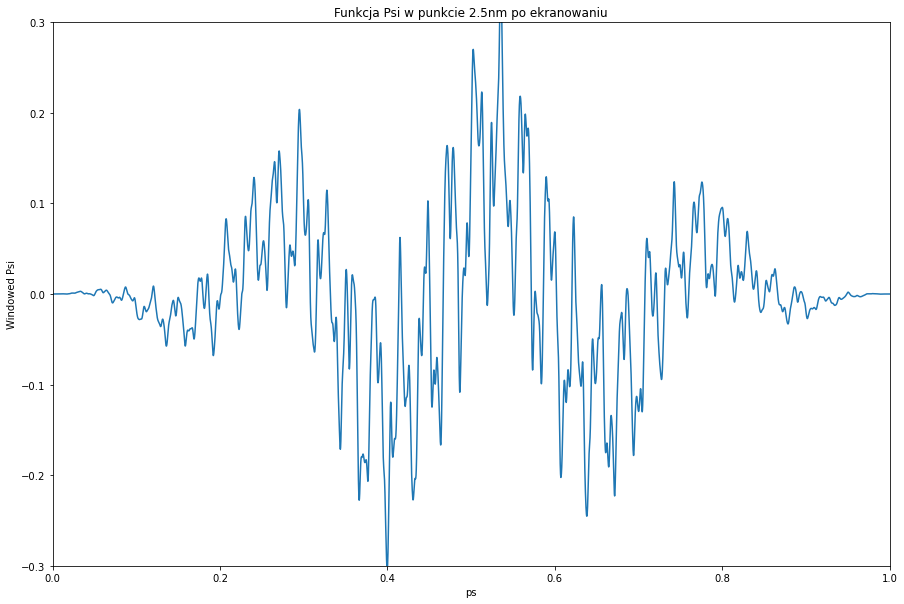

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 10**(12)*dt*T)
ax.set_ylim(-0.3, 0.3)
plt.xlabel('ps')
plt.ylabel('Windowed Psi')
ax.plot(PS, np.real(Pwin))

plt.title("Funkcja Psi w punkcie 2.5nm po ekranowaniu")
plt.show()

In [34]:
PF = (1/np.sqrt(Ntime))*np.abs(np.fft.fft(Pwin))
Pmax = np.max(PF)

Transformata Fouriera z uwzględnieniem ekranowania

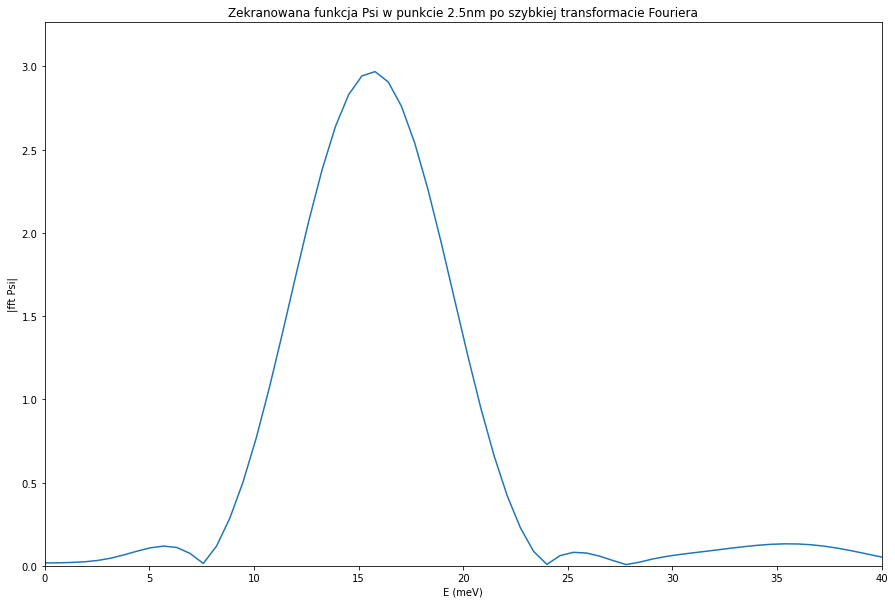

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, 40)
ax.set_ylim(0, 1.1*Pmax)
plt.xlabel('E (meV)')
plt.ylabel('|fft Psi|')
ax.plot(10**3*FF, PF)

plt.title("Zekranowana funkcja Psi w punkcie 2.5nm po szybkiej transformacie Fouriera")
plt.show()       

Poszukiwanie funkcji własnych

# Pierwsza funkcja własna

In [36]:
NN = 50
hbar = 1.054*10**(-34)
melec = 9.1*10**(-31)
eV2J = 1.6*10**(-19)
J2eV = 1/eV2J

del_x = 0.2*10**(-9)
dt = 10**(-16)
ra = (0.5*hbar/melec)*(dt/del_x**2)
DX = del_x*10**9
XX = np.arange(0, DX*NN, DX)

Określenie potencjału

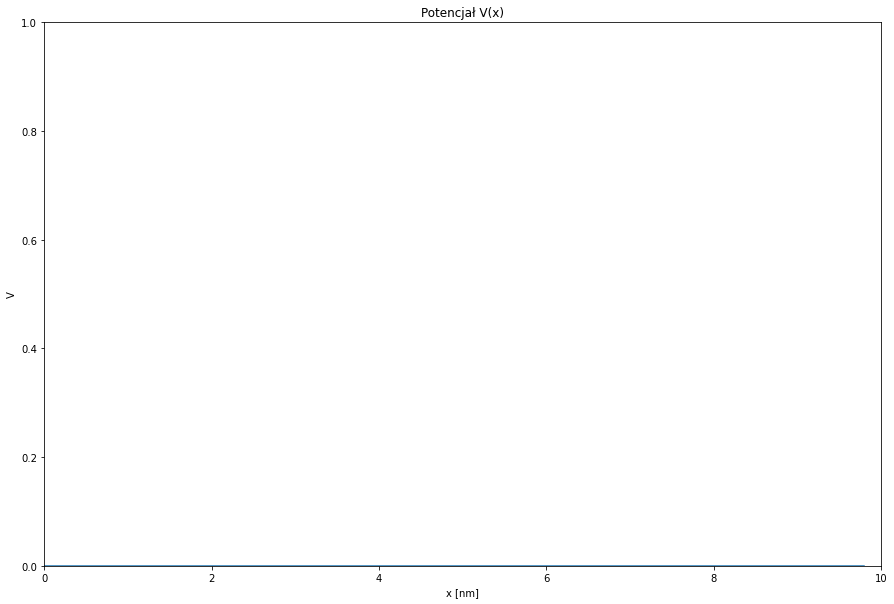

In [37]:
V = np.zeros(NN)

Umax =1

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(0,Umax)
plt.xlabel('x [nm]')
plt.ylabel('V')
ax.plot(XX, J2eV*V)

plt.title("Potencjał V(x)")
plt.show()

In [38]:
sigma = 3
nc = NN/2
prl = np.zeros(NN)
pim = np.zeros(NN)
ptot = 0
for n in range(1, NN-1):
    prl[n] = np.exp(-1*((n-nc)/sigma)**2) 
    ptot = ptot +prl[n]**2 + pim[n]**2
    
pnorm = np.sqrt(ptot)

In [39]:
ptot = 0
for n in range(NN):
    prl[n] = prl[n]/pnorm
    pim[n]=pim[n]/pnorm
    ptot = ptot +prl[n]**2+pim[n]**2
    
ptot

1.0

Określenie funkcji próbnej

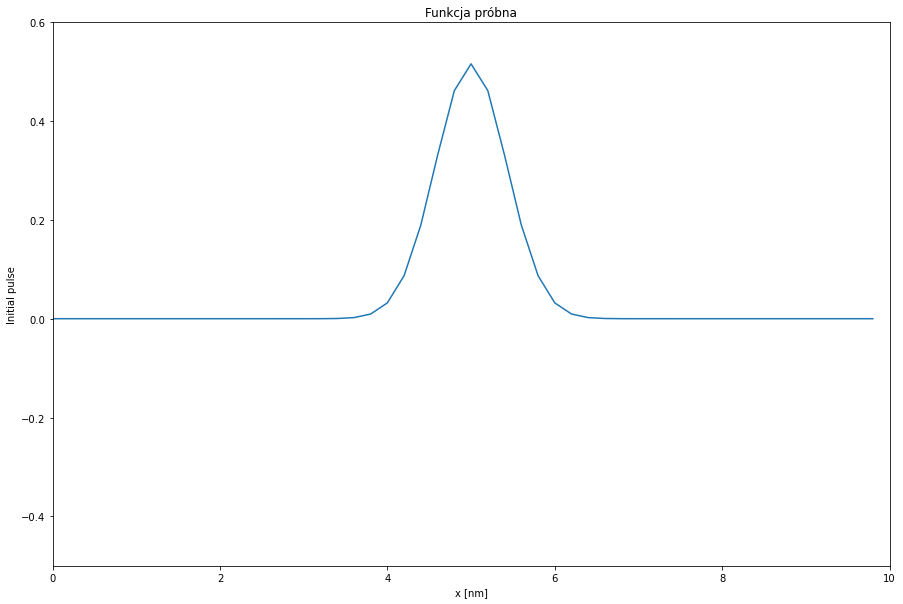

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.5, 0.6)
plt.xlabel('x [nm]')
plt.ylabel('Initial pulse')
ax.plot(XX, prl)

plt.title("Funkcja próbna")
plt.show()

Parametry do funkcji własnej

In [41]:
Ein = 3.75*10**(-3) #meV   
freq = Ein/(J2eV*2*np.pi*hbar)
omega = 2*np.pi*freq
arg = omega*dt
np.exp(-1j*arg)
Time_period = 1/(freq*dt)

In [42]:
Than = 15000
win = np.zeros(2**(16))
for n in range(Than):
    win[n] = 0.5*(1-np.cos(2*np.pi*n/Than))

Ekranowanie Hanninga

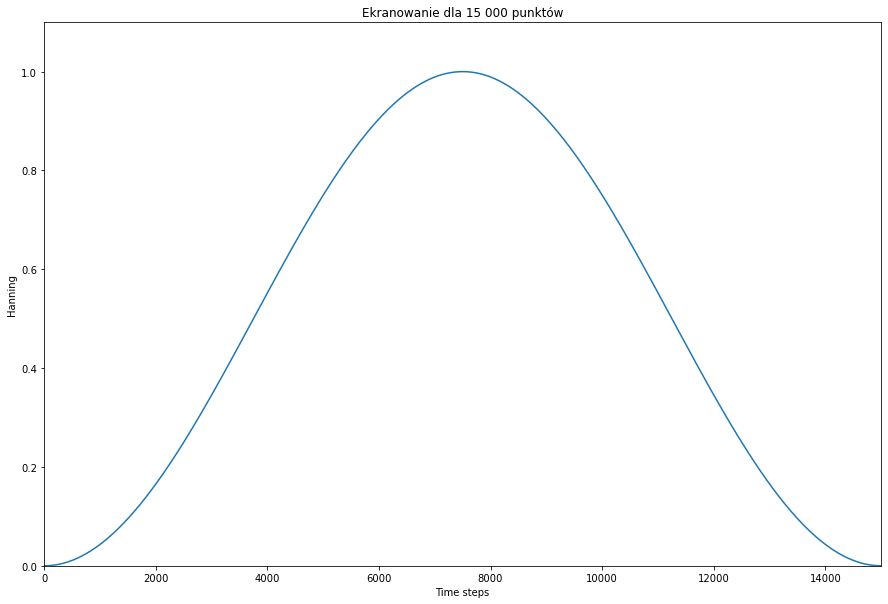

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, Than)
ax.set_ylim(0, 1.1)
plt.xlabel('Time steps')
plt.ylabel('Hanning')
ax.plot(win)

plt.title("Ekranowanie dla 15 000 punktów")
plt.show()

In [44]:
phi = np.zeros(NN, dtype = 'complex_')
phi0_rl = np.zeros(NN)
phi0_im = np.zeros(NN)
psi = np.zeros(NN, dtype = 'complex_')
phi_m = np.zeros(NN, dtype = 'complex_')

In [45]:
T = 0
n_step = 15000
for m in range(n_step):
    T = T + 1
    for n in range(1, NN-1):
        prl[n] = prl[n]-ra*(pim[n-1]-2*pim[n]+pim[n+1])+(dt/hbar)*V[n]*pim[n]
    for n in range(1, NN-1):
        pim[n] = pim[n]+ra*(prl[n-1]-2*prl[n]+prl[n+1])-(dt/hbar)*V[n]*prl[n]
        
    for n in range(1, NN-1):
        psi[n] = prl[n]+1j*pim[n]
        phi[n] = phi[n] + win[T]*np.exp(-1*1j*arg*T)*psi[n]
        

Część rzeczywista i urojona funkcji

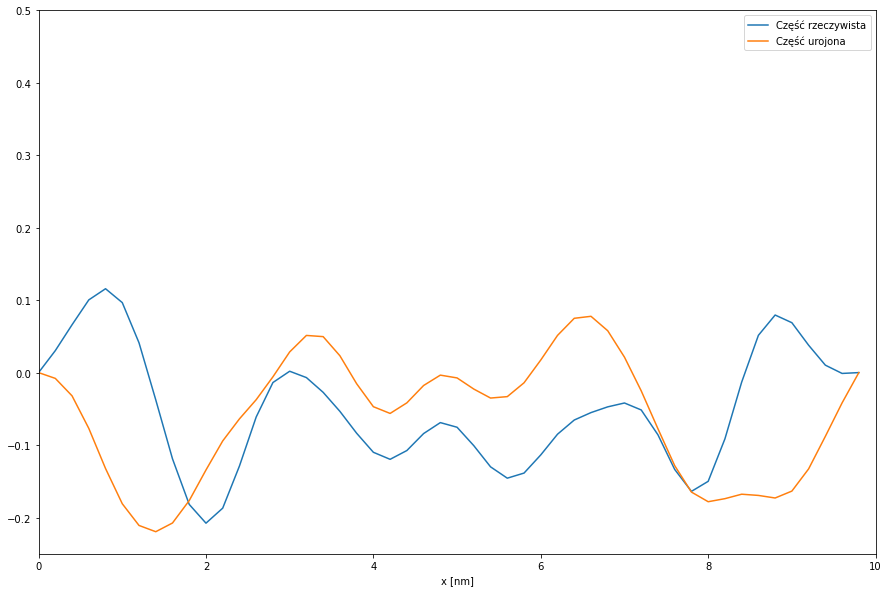

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.25, 0.5)
plt.xlabel('x [nm]')
plt.ylabel('')
ax.plot(XX, prl, label="Część rzeczywista")
ax.plot(XX, pim, label="Część urojona")

plt.legend()
plt.show()

Normalizacja phi

In [47]:
angle = np.zeros(NN)
ptot1 = 0
for n in range(NN):
    ptot1 =ptot1+ phi[n]*phi[n].conj()
ptot2 = 0
for n in range(NN):
    angle[n] = np.arctan2(np.imag(phi[n]), np.real(phi[n]))
    phi_m[n] = phi[n]/np.sqrt(ptot1)

Część rzeczywista i urojona funkcji własnej (przed normalizacją)

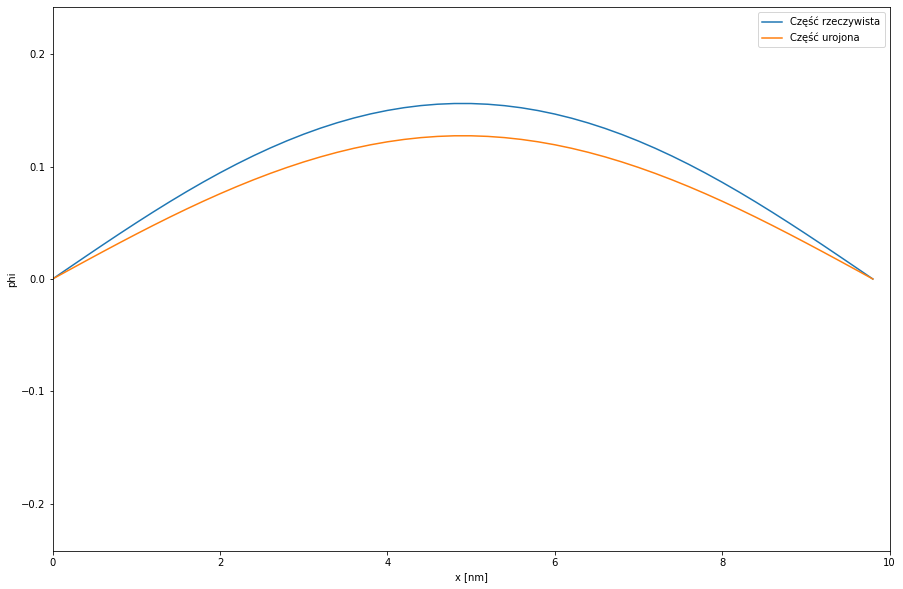

In [48]:
pmax = np.max(np.abs(phi_m))

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-1.2*pmax, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi')
ax.plot(XX,np.real(phi_m), label="Część rzeczywista")
ax.plot(XX,np.imag(phi_m), label="Część urojona")

plt.legend()
plt.show()

In [49]:
ang0 = angle[24] #puls umieszczono dokładnie w środku studni
for n in range(NN):
    angle[n] = angle[n]-ang0
    phi0_rl[n] = np.abs(phi_m[n])*np.cos(angle[n])
    phi0_im[n] = np.abs(phi_m[n])*np.sin(angle[n])
    
ptot =0
for n in range(NN):
    ptot =ptot+ phi0_rl[n]**2 
for n in range(NN):
    phi0_rl[n] = phi0_rl[n]/np.sqrt(ptot)
    phi0_im[n] = phi0_im[n]/np.sqrt(ptot)

Funckja własna dla energii własnej 3.75meV (część rzeczywista oraz urojona)

Część urojona jest w przybliżeniu zerowa, zatem otrzymana rzeczywista część funkcji własnej w przybliżeniu stanowi jej całość

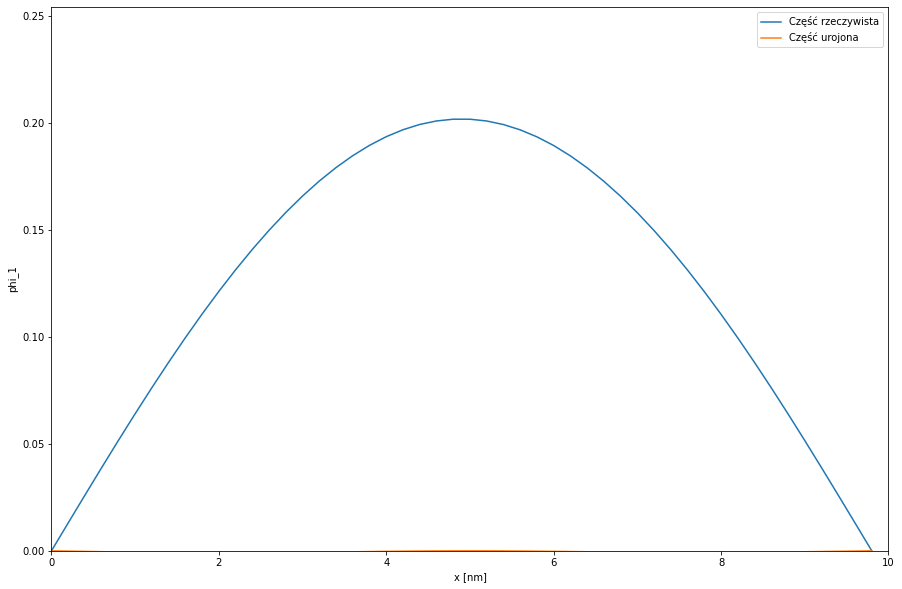

In [50]:
pmax = np.max(np.abs(phi0_rl))+0.01
pmin = np.min(np.abs(phi0_rl))

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(1.2*pmin, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi_1')
ax.plot(XX,phi0_rl, label="Część rzeczywista")
ax.plot(XX,phi0_im, label="Część urojona")

plt.legend()
plt.show()

## Trzecia funkcja własna ##

In [51]:
NN = 50
hbar = 1.054*10**(-34)
melec = 9.1*10**(-31)
eV2J = 1.6*10**(-19)
J2eV = 1/eV2J

del_x = 0.2*10**(-9)
dt = 10**(-16)
ra = (0.5*hbar/melec)*(dt/del_x**2)
DX = del_x*10**9
XX = np.arange(0, DX*NN, DX)

Potencjał

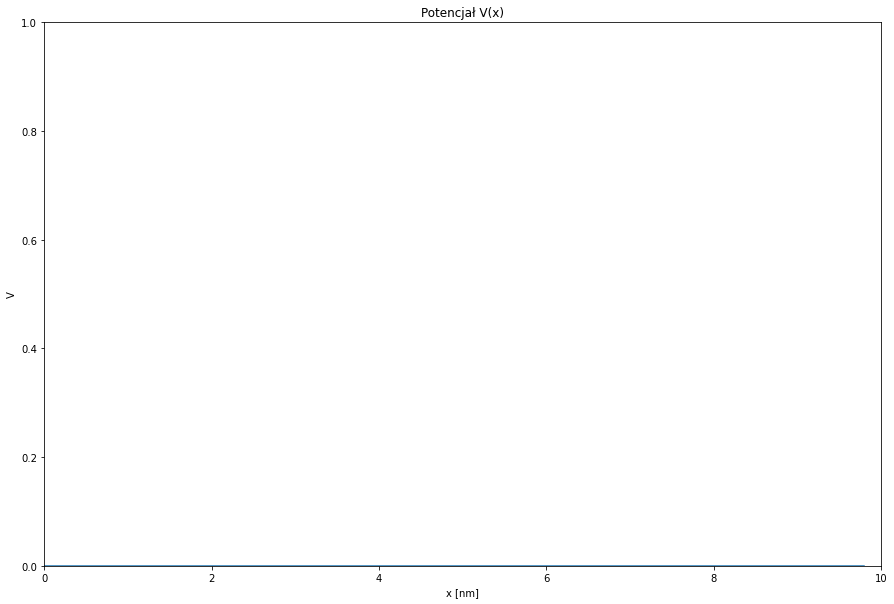

In [52]:
V = np.zeros(NN)

Umax =1

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(0,Umax)
plt.xlabel('x [nm]')
plt.ylabel('V')
ax.plot(XX, J2eV*V)

plt.title("Potencjał V(x)")
plt.show()

In [53]:
sigma = 3
nc = NN/2
prl = np.zeros(NN)
pim = np.zeros(NN)
ptot = 0
for n in range(1, NN-1):
    prl[n] = np.exp(-1*((n-nc)/sigma)**2) 
    ptot = ptot +prl[n]**2 + pim[n]**2
    
pnorm = np.sqrt(ptot)

In [54]:
ptot = 0
for n in range(NN):
    prl[n] = prl[n]/pnorm
    pim[n]=pim[n]/pnorm
    ptot = ptot +prl[n]**2+pim[n]**2
    
ptot

1.0

Teraz funkcja próbna

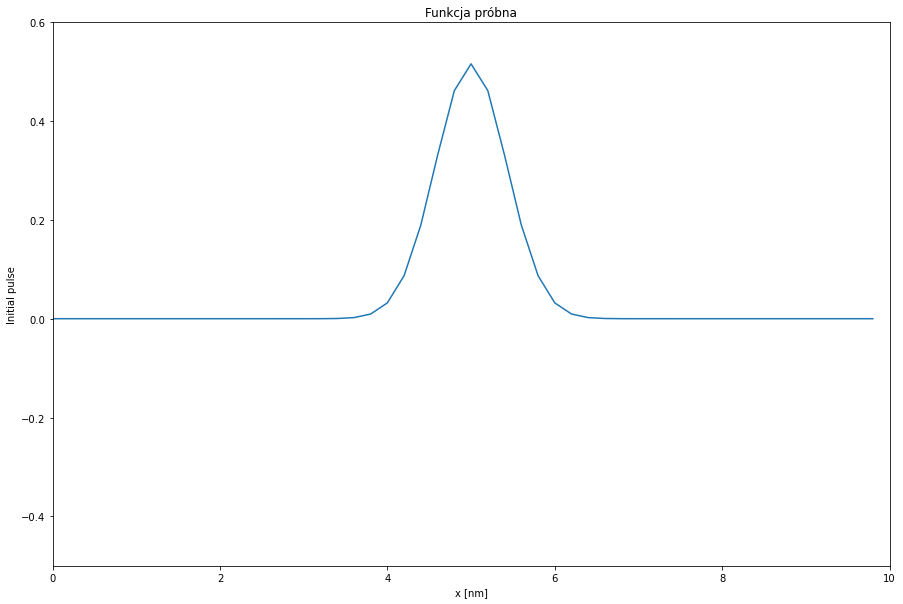

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.5, 0.6)
plt.xlabel('x [nm]')
plt.ylabel('Initial pulse')
ax.plot(XX, prl)

plt.title("Funkcja próbna")
plt.show()

Parametry

In [56]:
Ein = 33.75*10**(-3) #meV     
freq = Ein/(J2eV*2*np.pi*hbar)
omega = 2*np.pi*freq
arg = omega*dt
np.exp(-1j*arg)
Time_period = 1/(freq*dt)

In [57]:
Than = 65000
win = np.zeros(2**(16))
for n in range(Than):
    win[n] = 0.5*(1-np.cos(2*np.pi*n/Than))

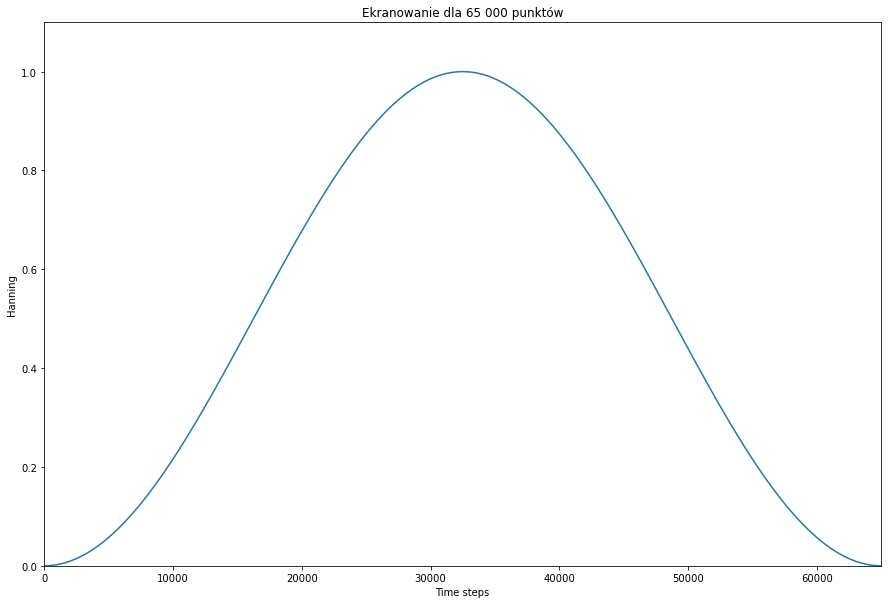

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, Than)
ax.set_ylim(0, 1.1)
plt.xlabel('Time steps')
plt.ylabel('Hanning')
ax.plot(win)

plt.title("Ekranowanie dla 65 000 punktów")
plt.show()

In [59]:
phi = np.zeros(NN, dtype = 'complex_')
phi0_rl = np.zeros(NN)
phi0_im = np.zeros(NN)
psi = np.zeros(NN, dtype = 'complex_')
phi_m = np.zeros(NN, dtype = 'complex_')

In [60]:
T = 0
n_step = 65000
for m in range(n_step):
    T = T + 1
    for n in range(1, NN-1):
        prl[n] = prl[n]-ra*(pim[n-1]-2*pim[n]+pim[n+1])+(dt/hbar)*V[n]*pim[n]
    for n in range(1, NN-1):
        pim[n] = pim[n]+ra*(prl[n-1]-2*prl[n]+prl[n+1])-(dt/hbar)*V[n]*prl[n]
        
    for n in range(1, NN-1):
        psi[n] = prl[n]+1j*pim[n]
        phi[n] = phi[n] + win[T]*np.exp(-1*1j*arg*T)*psi[n]
        

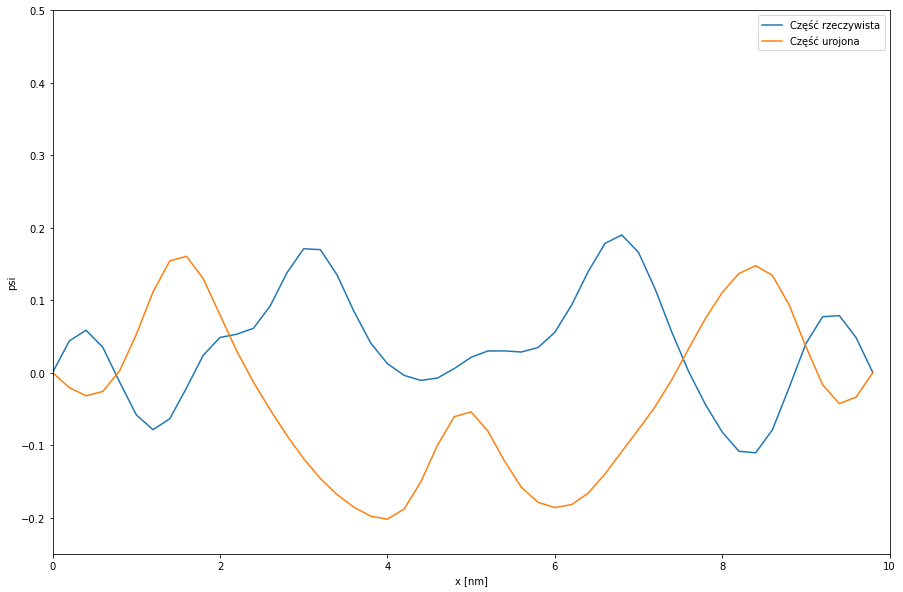

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.25, 0.5)
plt.xlabel('x [nm]')
plt.ylabel('psi')
ax.plot(XX, prl, label="Część rzeczywista")
ax.plot(XX, pim, label="Część urojona")

plt.legend()
plt.show()

Normalizacja Psi

In [62]:
angle = np.zeros(NN)
ptot1 = 0
for n in range(NN):
    ptot1 =ptot1+ phi[n]*phi[n].conj()
for n in range(NN):
    phi_m[n] = phi[n]/np.sqrt(ptot1)
    angle[n] =np.arctan2(np.imag(phi[n]), np.real(phi[n]))

RE i IM

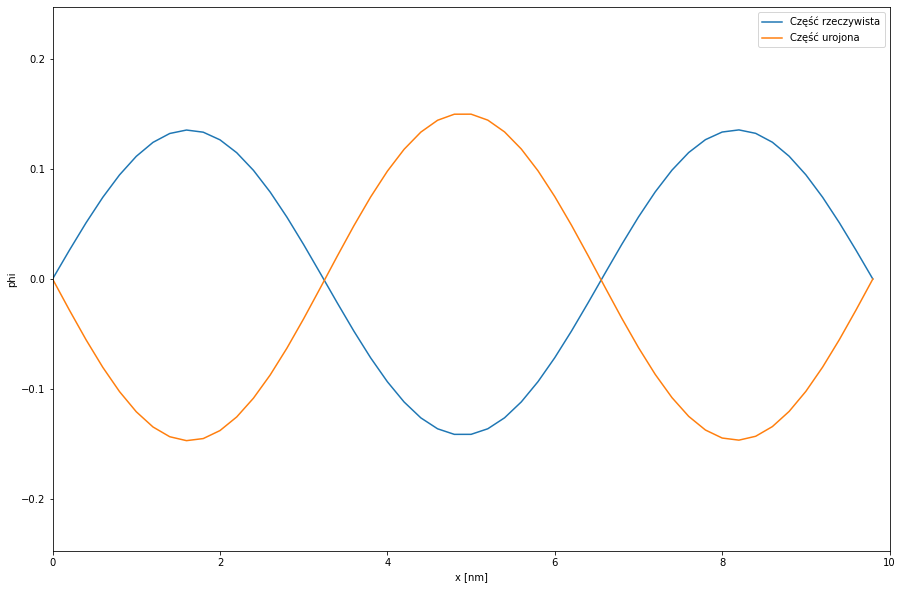

In [63]:
pmax = np.max(np.abs(phi_m))            

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-1.2*pmax, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi')
ax.plot(XX,np.real(phi_m), label="Część rzeczywista")
ax.plot(XX,np.imag(phi_m), label="Część urojona")

plt.legend()
plt.show()

In [64]:
ang0 = angle[24]
for n in range(NN):
    angle[n] = angle[n] - ang0
    phi0_rl[n] =- np.abs(phi_m[n])*np.cos(angle[n]) #JAK UZASADNIĆ ZNAK - ?
    phi0_im[n] = np.abs(phi_m[n])*np.sin(angle[n])
    
ptot =0
for n in range(NN):
    ptot =ptot+ phi0_rl[n]**2 
for n in range(NN):
    phi0_rl[n] = phi0_rl[n]/np.sqrt(ptot)
    phi0_im[n] = phi0_im[n]/np.sqrt(ptot)

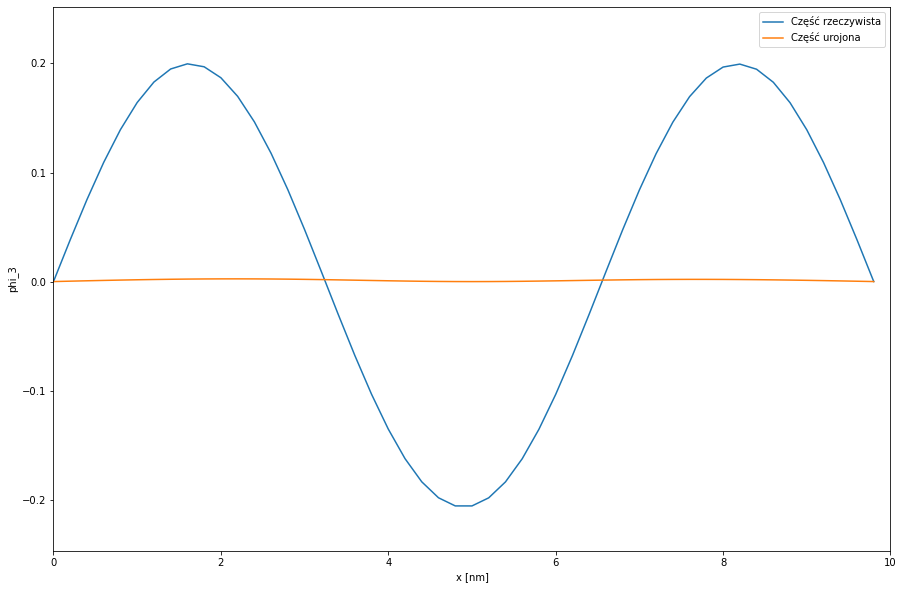

In [65]:
pmax = np.max(phi0_rl)+0.01         
pmin = np.min(phi0_rl)

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(1.2*pmin, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi_3')
ax.plot(XX,phi0_rl, label="Część rzeczywista")
ax.plot(XX,phi0_im, label="Część urojona")

plt.legend()
plt.show()

## Druga funkcja własna ##

In [66]:
NN = 50
hbar = 1.054*10**(-34)
melec = 9.1*10**(-31)
eV2J = 1.6*10**(-19)
J2eV = 1/eV2J

del_x = 0.2*10**(-9)
dt = 10**(-16)
ra = (0.5*hbar/melec)*(dt/del_x**2)
DX = del_x*10**9
XX = np.arange(0, DX*NN, DX)

Potencjal

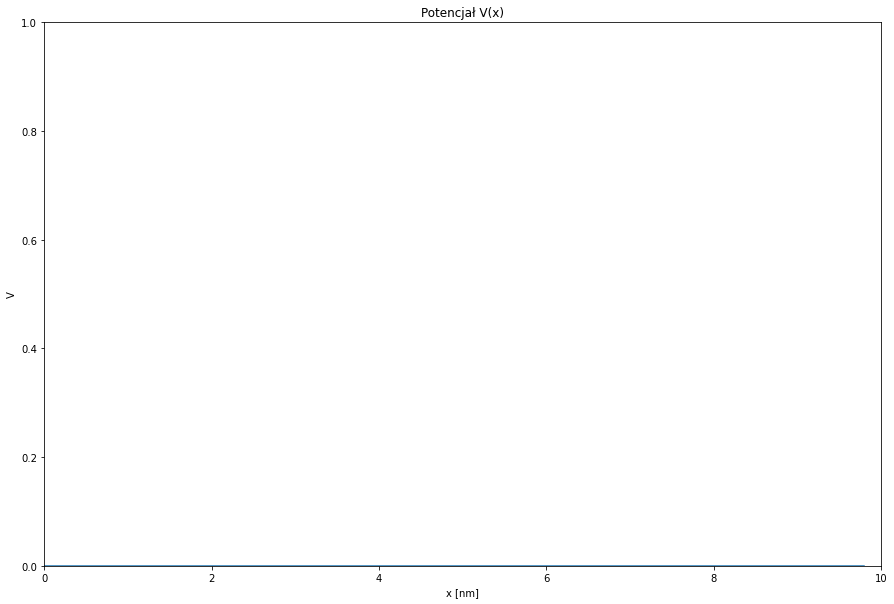

In [67]:
V = np.zeros(NN)

Umax =1

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(0,Umax)
plt.xlabel('x [nm]')
plt.ylabel('V')
ax.plot(XX, J2eV*V)

plt.title("Potencjał V(x)")
plt.show()

In [68]:
sigma = 3
nc = NN/2
prl = np.zeros(NN)
pim = np.zeros(NN)
ptot = 0
for n in range(1, NN-1):
    prl[n] = np.exp(-1*((12.5-n)/sigma)**2)-np.exp(-1*((37.5-n)/sigma)**2)
    ptot = ptot +prl[n]**2 + pim[n]**2
    
pnorm = np.sqrt(ptot)

In [69]:
ptot = 0
for n in range(NN):
    prl[n] = prl[n]/pnorm
    pim[n]=pim[n]/pnorm
    ptot = ptot +prl[n]**2+pim[n]**2

ptot

1.0000000000000007

Funkcja próbna

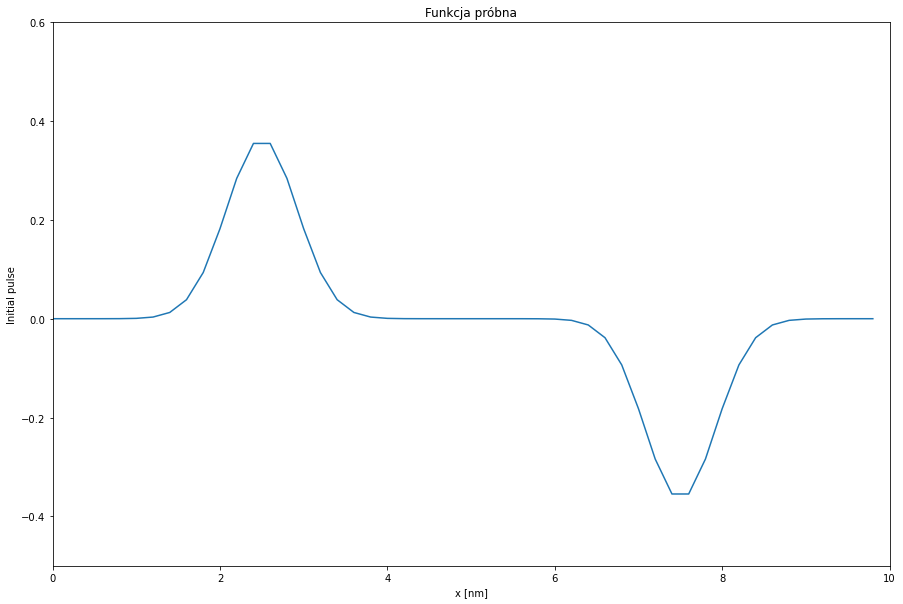

In [70]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.5, 0.6)
plt.xlabel('x [nm]')
plt.ylabel('Initial pulse')
ax.plot(XX, prl)

plt.title("Funkcja próbna")
plt.show()

Parametry

In [71]:
Ein = 15*10**(-3) #meV     ą
freq = Ein/(J2eV*2*np.pi*hbar)
omega = 2*np.pi*freq
arg = omega*dt
np.exp(-1j*arg)
Time_period = 1/(freq*dt)

In [72]:
Than = 15000
win = np.zeros(2**(16))
for n in range(Than):
    win[n] = 0.5*(1-np.cos(2*np.pi*n/Than))

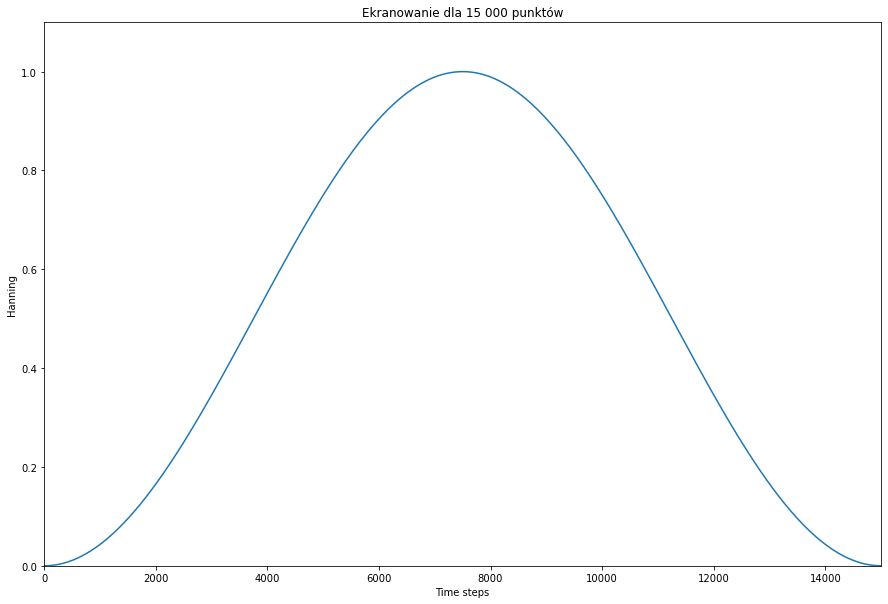

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, Than)
ax.set_ylim(0, 1.1)
plt.xlabel('Time steps')
plt.ylabel('Hanning')
ax.plot(win)

plt.title("Ekranowanie dla 15 000 punktów")
plt.show()

In [74]:
phi = np.zeros(NN, dtype = 'complex_')
phi0_rl = np.zeros(NN)
phi0_im = np.zeros(NN)
psi = np.zeros(NN, dtype = 'complex_')
phi_m = np.zeros(NN, dtype = 'complex_')

In [75]:
T = 0
n_step = 15000
for m in range(n_step):
    T = T + 1
    for n in range(1, NN-1):
        prl[n] = prl[n]-ra*(pim[n-1]-2*pim[n]+pim[n+1])+(dt/hbar)*V[n]*pim[n]
    for n in range(1, NN-1):
        pim[n] = pim[n]+ra*(prl[n-1]-2*prl[n]+prl[n+1])-(dt/hbar)*V[n]*prl[n]
        
    for n in range(1, NN-1):
        psi[n] = prl[n]+1j*pim[n]
        phi[n] = phi[n] + win[T]*np.exp(-1*1j*arg*T)*psi[n]

In [76]:
psi*psi.conj()

array([0.        +0.j, 0.00201272+0.j, 0.00373489+0.j, 0.00215368+0.j,
       0.00089625+0.j, 0.00427249+0.j, 0.01470004+0.j, 0.02747446+0.j,
       0.03294206+0.j, 0.03090695+0.j, 0.03202538+0.j, 0.04002144+0.j,
       0.04577405+0.j, 0.04230584+0.j, 0.03336061+0.j, 0.02616183+0.j,
       0.02295384+0.j, 0.02006856+0.j, 0.0138536 +0.j, 0.00625005+0.j,
       0.00192522+0.j, 0.00234612+0.j, 0.00593011+0.j, 0.00821856+0.j,
       0.00492259+0.j, 0.00152944+0.j, 0.0052034 +0.j, 0.01023644+0.j,
       0.0102087 +0.j, 0.01026852+0.j, 0.0166542 +0.j, 0.0268583 +0.j,
       0.03444332+0.j, 0.03811021+0.j, 0.04188845+0.j, 0.04814859+0.j,
       0.05320425+0.j, 0.05235429+0.j, 0.04829671+0.j, 0.0468528 +0.j,
       0.04538368+0.j, 0.03695999+0.j, 0.02295316+0.j, 0.01087524+0.j,
       0.00485448+0.j, 0.00339425+0.j, 0.0030002 +0.j, 0.00193556+0.j,
       0.00060533+0.j, 0.        +0.j])

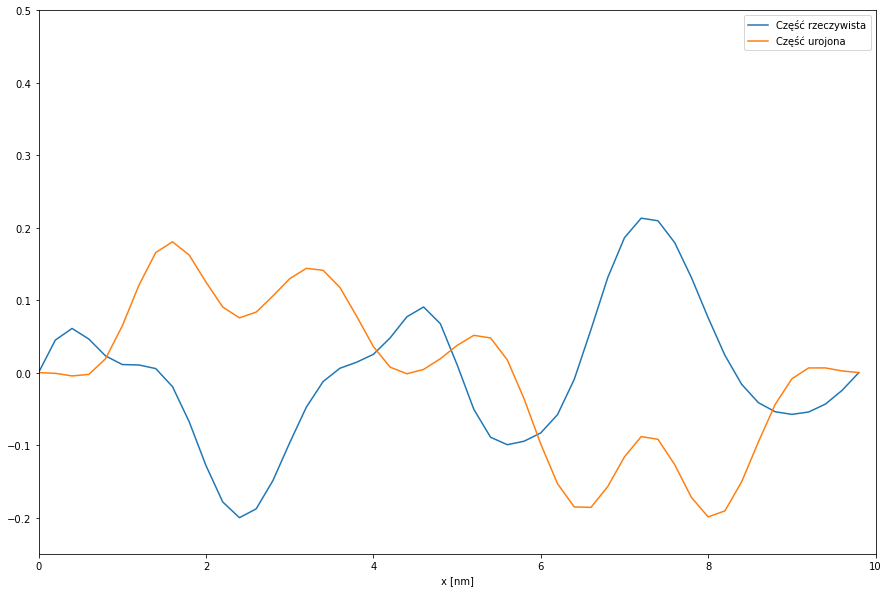

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-0.25, 0.5)
plt.xlabel('x [nm]')
plt.ylabel('')
ax.plot(XX, prl, label="Część rzeczywista")
ax.plot(XX, pim, label="Część urojona")

plt.legend()
plt.show()

Normalizacja Psi

In [78]:
angle = np.zeros(NN)
ptot1 = 0
for n in range(NN):
    ptot1 =ptot1+ phi[n]*phi[n].conj()
ptot2 = 0
for n in range(NN):
    angle[n] = np.arctan2(np.imag(phi[n]), np.real(phi[n]))
    phi_m[n] = phi[n]/np.sqrt(ptot1)

RE I IM

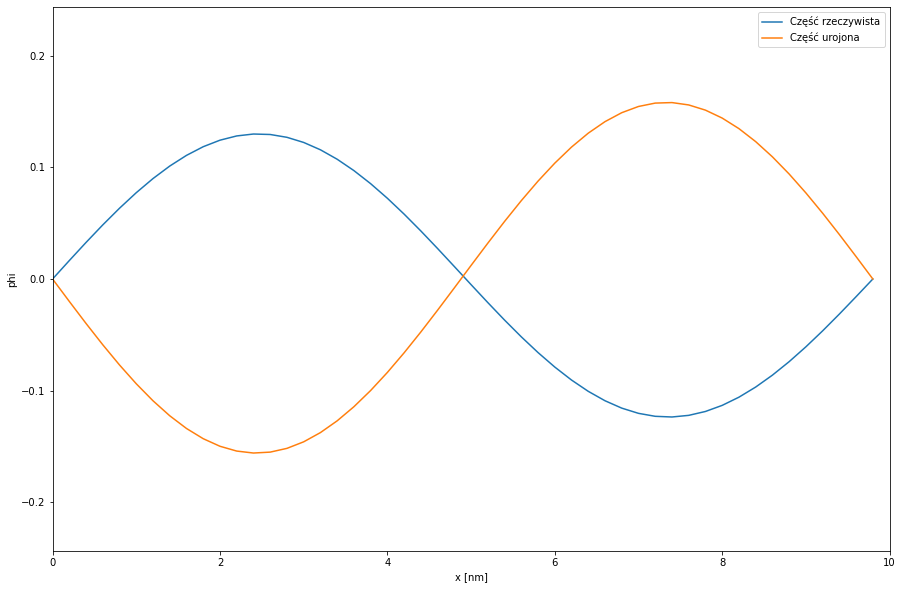

In [79]:
pmax = np.max(np.abs(phi_m))            

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-1.2*pmax, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi')
ax.plot(XX,np.real(phi_m), label="Część rzeczywista")
ax.plot(XX,np.imag(phi_m), label="Część urojona")

plt.legend()
plt.show()

In [80]:
ang0 = (angle[13]+angle[14])/2 #w książce podano, gdzie zostało zbadane time-domain data
for n in range(NN):
    angle[n] = angle[n]-ang0
    phi0_rl[n] = np.abs(phi_m[n])*np.cos(angle[n])
    phi0_im[n] = np.abs(phi_m[n])*np.sin(angle[n])
    
ptot =0
for n in range(NN):
    ptot =ptot+ phi0_rl[n]**2 
for n in range(NN):
    phi0_rl[n] = phi0_rl[n]/np.sqrt(ptot)
    phi0_im[n] = phi0_im[n]/np.sqrt(ptot)

In [81]:
phi0_im

array([ 0.        , -0.00021137, -0.00041244, -0.00059295, -0.00074291,
       -0.00085312, -0.00091617, -0.00092749, -0.00088639, -0.0007964 ,
       -0.0006647 , -0.00050058, -0.00031322, -0.00010952,  0.00010724,
        0.00033766,  0.00058513,  0.00085423,  0.00114906,  0.0014721 ,
        0.00182379,  0.00220271,  0.00260608,  0.00303025,  0.00347084,
        0.00392254,  0.0043785 ,  0.00482977,  0.0052649 ,  0.00567021,
        0.0060308 ,  0.00633219,  0.00656212,  0.00671217,  0.00677855,
        0.00676192,  0.00666607,  0.00649603,  0.00625629,  0.00594972,
        0.00557783,  0.0051419 ,  0.00464431,  0.00408952,  0.00348412,
        0.00283638,  0.00215531,  0.00144993,  0.00072881,  0.        ])

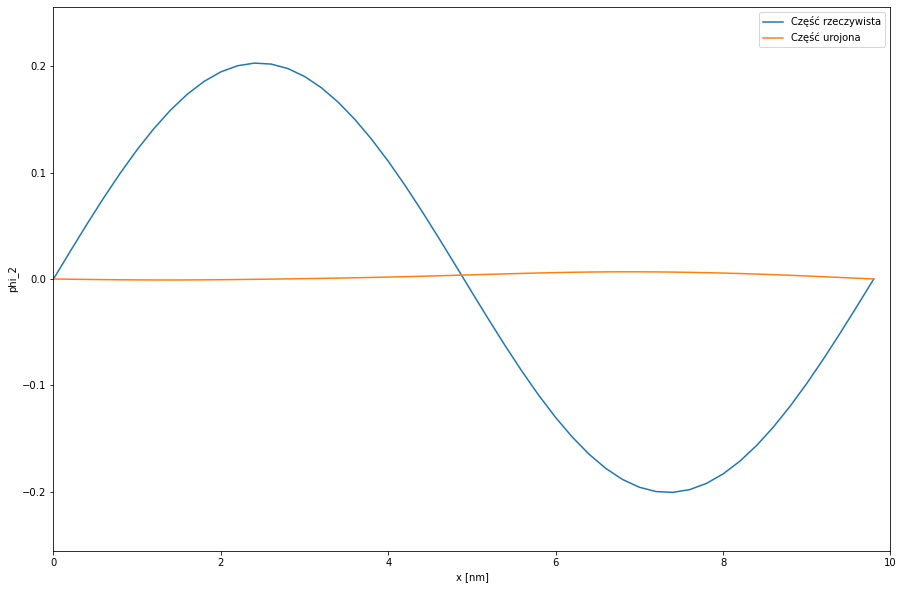

In [82]:
pmax = np.max(np.abs(phi0_rl))+0.01        
pmin = np.min(np.abs(phi0_rl))

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(0, DX*NN)
ax.set_ylim(-1.2*pmax, 1.2*pmax)
plt.xlabel('x [nm]')
plt.ylabel('phi_2')
ax.plot(XX,phi0_rl, label="Część rzeczywista")
ax.plot(XX,phi0_im, label="Część urojona")

plt.legend()
plt.show()